# SFCompo Data in Python/Pandas

The new SFCompo database is in a local file that may be explored and manipulated using Pandas,
a data analysis package written for Python. This notebook is copied from Kanneth Dayman's jupyter
notebook, which is a manual on basic use of pandas; it is edited for the use of AO's project. 
Specifically, this notebook extracts parameters from the entries to do ORIGEN simulations of the 
SFCompo database.

The data is located in ./SFCompo-complete-Sept2017_modified.pkl 

## Startup

In [1]:
# import statements: pandas for manipulating data, matplotlib for basic plotting, 
# and seaborn for pretty plotting specialized for statistical analysis
import pandas as pd, seaborn as sns, matplotlib.pyplot as plt, numpy as np

# use a iPython magic function to embed plots in the notebook
%matplotlib inline

# import data
X = pd.read_pickle('./SFCompo-complete-Sept2017_modified.pkl')

Now the variable X contains the data, which contains approximately 23,000 measurements. Each measurement is located in a separate row, and all data assocaited with the measurement, reactor of origin, assembly of origin, and rod of origin are given in 172 columns. Not all columns are populated for each measurement (e.g., Calandria dimensions are not given for samples drawn from PWRs), and unpopulated entries are filled with NaN or '-'. Pandas will ignore such entries by default when sorting and slicing data. 

In [17]:
X.head()

,A,Absorber material,Absorber rod cladding inner diameter,Absorber rod cladding material,Absorber rod cladding outside diameter,Absorber rod pellet diameter,Absorber rod type,Active core diameter,Active core height,Active length,...,Water wing internal thickness,Water wing wall density,Water wing wall material,Water wing wall temperature,Water wing wall thickness,Wide water gap,Z,e. Pu,e. Pu239 + Pu241,e. U235
SFCompo sample ref,,,,,,,,,,,,,,,,,,,,,
BAL-2|1476|42|15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.16,3.53,3530.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.4
BAL-2|1476|42|15,241.0,NaN,NaN,NaN,NaN,NaN,NaN,3.16,3.53,3530.0,...,NaN,NaN,NaN,NaN,NaN,NaN,95.0,NaN,NaN,4.4
BAL-2|1476|42|15,243.0,NaN,NaN,NaN,NaN,NaN,NaN,3.16,3.53,3530.0,...,NaN,NaN,NaN,NaN,NaN,NaN,95.0,NaN,NaN,4.4
BAL-2|1476|42|15,242.0,NaN,NaN,NaN,NaN,NaN,NaN,3.16,3.53,3530.0,...,NaN,NaN,NaN,NaN,NaN,NaN,96.0,NaN,NaN,4.4
BAL-2|1476|42|15,244.0,NaN,NaN,NaN,NaN,NaN,NaN,3.16,3.53,3530.0,...,NaN,NaN,NaN,NaN,NaN,NaN,96.0,NaN,NaN,4.4


## Basic Searching and Slicing

In [2]:
# List the columns in the database
for col in X.columns:
    print(col)
    # if using Python 3, use
    # print(col)

A
Absorber material
Absorber rod cladding inner diameter
Absorber rod cladding material
Absorber rod cladding outside diameter
Absorber rod pellet diameter
Absorber rod type
Active core diameter
Active core height
Active length
Angular offset (1)
Angular offset (2)
Angular offset (3)
Angular offset (4)
Assembly dimension
Assembly lattice
Assembly model
Assembly pitch (narrow-narrow)
Assembly pitch (wide-wide)
Assembly rod pitch
Axial length
Axial position
Axial position from bottom
Bundles per channel
Calandria tube density
Calandria tube inner diameter
Calandria tube material
Calandria tube outer diameter
Calandria tube temperature
Central tie rod density
Central tie rod diameter
Central tie rod material
Central tie rod temperature
Central tube density
Central tube inner diameter
Central tube material
Central tube outer diameter
Central tube temperature
Channel  inner width
Channel box inner width
Channel box material
Channel box outer width
Channel corner inner radius
Channel corner 

In [ ]:
# Extract a single column: Assembly Identifier
X['Assembly identifier']

In [ ]:
# Find data with Burnup greater than 40 GWd/MTIHM and then coolant, moderator, and fuel type
X.loc[X['Estimated burnup'] > 40.0, ['Reactor coolant','Reactor moderator','Fuel type']]

In [ ]:
# List all fuel types
X['Fuel type'].unique()
# Can also do this by looping through the above list and printing each entry for a pettier output (see below)

In [ ]:
# Let's pull out measurements of MOX fuel and inspect the Pu Enrichment, Pu-239 + Pu-241, and U-235 Enrichment
X.loc[X['Fuel type'] == 'MOX',['e. Pu','e. Pu239 + Pu241','e. U235']]

# Filter for ORIGEN-relevant parameters

In [79]:
X_unique = X.drop_duplicates(subset=['Reactor name','Reactor type','Reactor design','Estimated burnup','e. U235'])
X_origen = X_unique[['Reactor type','Reactor design','Fuel type','Reactor moderator','Estimated burnup',
                     'Thermal power','Moderator density','Moderator temperature','Uranium weight','e. Pu','e. Pu239 + Pu241','e. U235']]

## Rxtrs & Fuel Types

In [80]:
UOX = X_origen.loc[(X_origen['Fuel type'] == 'UO2')]
reactor_type = UOX['Reactor type'].unique()
reactor_design = UOX['Reactor design'].unique()
#fuel_type = X_origen['Fuel type'].unique()

print(reactor_type)
print(reactor_design)

['VVER-1000' 'CANDU' 'PWR' 'BWR' 'AGR' 'VVER-440' 'RBMK']
[320.0 'AECL' 'Combustion Engineering' 'Entergy' 'General Electric'
 'ASEA Atom' 'Toshiba' 'Hitachi' 'Mitsubishi' nan 'KWU' 'Westinghouse'
 'The Nuclear Power Group' 'Demonstration' 338.0 213.0 'Siemens/KWU' 179.0
 187.0 'Siemens AG' 'Westinghouse Mitsubishi Heavy Industries'
 'Mitsubishi Nuclear Fuel 3-loop' 'B&W' 'Westinghouse Electric Corporation'
 'Westinghouse - 3 loop']


### PWR Parameters

In [86]:
pwr = UOX.loc[UOX['Reactor type'] == 'PWR']
vver = UOX.loc[UOX['Reactor type'].str.contains('VVER')]
vver

,Reactor type,Reactor design,Fuel type,Reactor moderator,Estimated burnup,Thermal power,Moderator density,Moderator temperature,Uranium weight,e. Pu,e. Pu239 + Pu241,e. U235
SFCompo sample ref,,,,,,,,,,,,
BAL-2|1476|42|15,VVER-1000,320,UO2,Light water,45.10,3000.0,NaN,NaN,76.0,NaN,NaN,4.400
BAL-2|1476|42|31,VVER-1000,320,UO2,Light water,45.80,3000.0,NaN,NaN,76.0,NaN,NaN,4.400
BAL-2|1476|42|6,VVER-1000,320,UO2,Light water,46.70,3000.0,NaN,NaN,76.0,NaN,NaN,4.400
BAL-3|1591|23|581,VVER-1000,320,UO2,Light water,47.90,3000.0,NaN,NaN,76.0,NaN,NaN,4.400
BAL-3|1591|23|912,VVER-1000,320,UO2,Light water,46.20,3000.0,NaN,NaN,76.0,NaN,NaN,4.400
KAL-1|623|266|29,VVER-1000,338,UO2,Light water,13.50,3000.0,NaN,NaN,76.0,NaN,NaN,4.400
KAL-1|623|312|28,VVER-1000,338,UO2,Light water,14.00,3000.0,NaN,NaN,76.0,NaN,NaN,3.600
KAL-1|623|312|30,VVER-1000,338,UO2,Light water,16.60,3000.0,NaN,NaN,76.0,NaN,NaN,3.600
KAL-1|623|312|33,VVER-1000,338,UO2,Light water,14.30,3000.0,NaN,NaN,76.0,NaN,NaN,3.600


In [73]:
pwr_d = pwr['Reactor design'].unique()
pwr_e = pwr['e. U235'].sort_values().unique()
pwr_b = pwr['Estimated burnup'].sort_values().unique()
vver_d = vver['Reactor design'].unique()
vver_e = vver['e. U235'].sort_values().unique()
vver_b = vver['Estimated burnup'].sort_values().unique()

#print(pwr_d)
#print(pwr_e)
#print(pwr_b)
print(vver_d)
#print(vver_e)
#print(vver_b)

[320.0 338.0 213.0 179.0 187.0]


In [77]:
X_unique.loc[X_unique['Reactor type'].str.contains('VVER')]['Number of fuel rods']

SFCompo sample ref
BAL-2|1476|42|15           312.0
BAL-2|1476|42|31           312.0
BAL-2|1476|42|6            312.0
BAL-3|1591|23|581          312.0
BAL-3|1591|23|912          312.0
KAL-1|623|266|29           312.0
KAL-1|623|312|28           312.0
KAL-1|623|312|30           312.0
KAL-1|623|312|33           312.0
KAL-1|623|312|448          312.0
KOL-3|144-46879|61|124     126.0
KOL-3|144-46879|61|13      126.0
KOL-3|144-46879|61|189     126.0
KOL-3|144-46879|61|53      126.0
KOL-3|144-46879|61|76      126.0
KOL-3|144-46879|62|165     126.0
KOL-3|144-46879|62|81      126.0
KOL-3|144-46879|96|5       126.0
KOL-3|144-46879|96|63      126.0
KOL-3|144-46879|96|718     126.0
KOL-3|144-46879|96|98      126.0
NOV-3|RP-3371A|58|4        126.0
NOV-3|RP-3371A|63|1        126.0
NOV-3|RP-3371A|63|5        126.0
NOV-3|RP-3371A|97|2        126.0
NOV-3|RP-3371A|97|3        126.0
NOV-3|RP-3371A|97|6        126.0
NOV-3|RP-3371A|97|7        126.0
NOV-4|13602496|123|27      126.0
NOV-4|13602496|25|19    

### BWR Parameters

In [52]:
bwr = UOX.loc[(UOX['Reactor type'] == 'BWR')]

In [65]:
bwr_d = bwr['Reactor design'].unique()
bwr_e = bwr['e. U235'].sort_values().unique()
bwr_b = bwr['Estimated burnup'].sort_values().unique()
print(bwr_d)
print(bwr_e)
print(bwr_b)

['Entergy' 'General Electric' 'ASEA Atom' 'Toshiba' 'Hitachi' nan
 'Demonstration']
[ 0.71  1.44  1.45  1.6   1.87  2.1   2.14  2.41  2.53  2.6   2.87  2.94
  3.    3.01  3.4   3.8   3.91  3.97  4.5   4.9   4.94]
[  2.185   2.679   2.745   2.907   3.344   3.904   4.085   4.114   4.15
   4.2     4.304   4.987   5.04    5.121   5.149   5.25    5.292   5.386
   5.443   5.481   5.58    5.671   5.7     5.814   5.85    5.918   5.928
   6.08    6.118   6.15    6.156   6.223   6.384   6.593   6.64    6.783
   6.86    7.04    7.096   7.19    7.44    7.92    8.14    8.26    8.32
   8.64    8.85    8.93    9.14    9.44    9.8    10.28   10.51   10.54
  10.57   10.59   10.66   10.8    11.33   11.92   12.13   12.7    12.83
  14.     14.04   14.48   14.69   15.22   15.68   15.74   15.94   15.97
  16.1    17.57   17.84   18.14   18.2    18.39   18.53   18.82   18.96
  19.2    19.24   19.89   20.45   21.12   21.18   21.69   21.89   22.1
  22.13   22.4    23.83   23.9    24.23   24.38   24.67   24.77  

### PHWR Parameters

In [70]:
phwr = UOX.loc[(UOX['Reactor type'] == 'CANDU')]
phwr

,Reactor type,Reactor design,Fuel type,Reactor moderator,Estimated burnup,Electric power,Moderator density,Moderator temperature,Uranium weight,e. Pu,e. Pu239 + Pu241,e. U235
SFCompo sample ref,,,,,,,,,,,,
BRU-1|F21037C|1|1,CANDU,AECL,UO2,Heavy water,7.8,825.0,1.083,346.0,119.0,NaN,NaN,0.711
NPD-1|1016|1|1,CANDU,AECL,UO2,Heavy water,5.3,22.0,NaN,311.0,40.0,NaN,NaN,0.711
NPD-1|1016|2|1,CANDU,AECL,UO2,Heavy water,5.6,22.0,NaN,311.0,40.0,NaN,NaN,0.711
NPD-1|1016|3|1,CANDU,AECL,UO2,Heavy water,6.6,22.0,NaN,311.0,40.0,NaN,NaN,0.711
NPD-1|1022|A|1,CANDU,AECL,UO2,Heavy water,791.0,22.0,NaN,311.0,40.0,NaN,NaN,0.711
NPD-1|1022|B|1,CANDU,AECL,UO2,Heavy water,854.0,22.0,NaN,311.0,40.0,NaN,NaN,0.711
NPD-1|1022|C|1,CANDU,AECL,UO2,Heavy water,1059.0,22.0,NaN,311.0,40.0,NaN,NaN,0.711
NPD-1|1052|A|1,CANDU,AECL,UO2,Heavy water,6526.0,22.0,NaN,311.0,40.0,NaN,NaN,0.711
NPD-1|1052|B|1,CANDU,AECL,UO2,Heavy water,6927.0,22.0,NaN,311.0,40.0,NaN,NaN,0.711


In [60]:
phwr_d = phwr['Reactor design'].unique()
phwr_b = phwr['Estimated burnup'].sort_values().unique()
print(phwr_d)
print(phwr_b)

['AECL']
[  5.30000000e+00   5.60000000e+00   6.60000000e+00   7.80000000e+00
   2.21000000e+02   7.91000000e+02   8.54000000e+02   1.05900000e+03
   1.22300000e+03   1.30600000e+03   1.62200000e+03   2.73300000e+03
   3.55000000e+03   3.80900000e+03   4.45300000e+03   5.33700000e+03
   5.37200000e+03   5.97600000e+03   6.52600000e+03   6.82800000e+03
   6.92700000e+03   7.64200000e+03   8.05000000e+03   8.53000000e+03
   9.22400000e+03   9.63200000e+03   9.80000000e+03   1.15010000e+04]


In [69]:
X_unique.loc[(X_unique['Reactor type'] == 'CANDU')]['Number of fuel rods']

SFCompo sample ref
BRU-1|F21037C|1|1     37.0
NPD-1|1016|1|1        19.0
NPD-1|1016|2|1        19.0
NPD-1|1016|3|1        19.0
NPD-1|1022|A|1        19.0
NPD-1|1022|B|1        19.0
NPD-1|1022|C|1        19.0
NPD-1|1052|A|1        19.0
NPD-1|1052|B|1        19.0
NPD-1|1052|C|1        19.0
NPD-1|1092|A|1        19.0
NPD-1|1092|B|1        19.0
NPD-1|1092|C|1        19.0
NPD-1|1096|A|1        19.0
NPD-1|1096|B|1        19.0
NPD-1|1096|C|1        19.0
NPD-1|1129|A|1        19.0
NPD-1|1129|B|1        19.0
NPD-1|1129|C|1        19.0
NPD-1|1630|A|1        19.0
NPD-1|1630|C|1        19.0
NPD-1|922|A|1         19.0
NPD-1|922|B|1         19.0
NPD-1|922|C|1         19.0
NPD-1|955|A|1         19.0
NPD-1|955|B|1         19.0
NPD-1|955|C|1         19.0
PIK-1|PA19558C|7|1    28.0
Name: Number of fuel rods, dtype: float64

### Graphite-moderated Reactors

In [57]:
agr = UOX.loc[(UOX['Reactor type'] == 'AGR')]
rbmk = UOX.loc[(UOX['Reactor type'] == 'RBMK')]

# Some Statistics and Plotting

## Average Burnup of Fuel vs Reactor Type

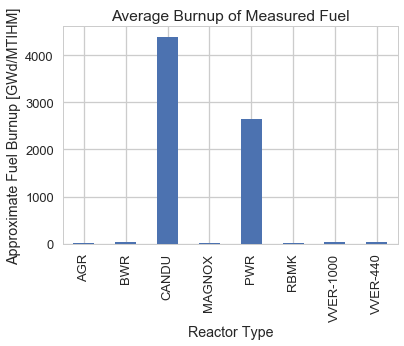

In [23]:
# There are more measurements of some reactors than others, and this will skew statistics
# First, reduce the data to one row per rod since the burnup is not specific to individual measurements in the data
#X_unique_rods = X.drop_duplicates(subset=X.index)
X_unique_rods = X.drop_duplicates(subset=['Reactor name','Estimated burnup'])
#Y = sfc.changeUnits(X_unique_rods, 'Estimated burnup','MW*d/tUi', U, cF)['Estimated burnup']

# Group the data together by reactor type, compute the mean of the burnup entry and create a bar chart
X_unique_rods.groupby('Reactor type')['Estimated burnup'].mean().plot(kind='bar')
plt.title('Average Burnup of Measured Fuel')
plt.xlabel('Reactor Type')
plt.ylabel('Approximate Fuel Burnup [GWd/MTIHM]')
plt.show()

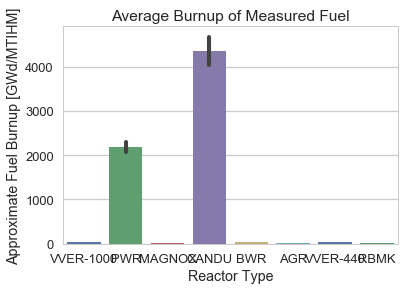

In [24]:
# This time we'll explicitly use Seaborn for plotting and change some settings to make a prettier plot
sns.set(style='whitegrid',context='talk')
sns.barplot(x=X['Reactor type'], y=X['Estimated burnup'], palette="deep",estimator=np.mean)

# replot
#X_unique_rods.groupby('Reactor Type').Burnup.mean().plot(kind='bar')
plt.title('Average Burnup of Measured Fuel')
plt.xlabel('Reactor Type')
plt.ylabel('Approximate Fuel Burnup [GWd/MTIHM]')
plt.show()

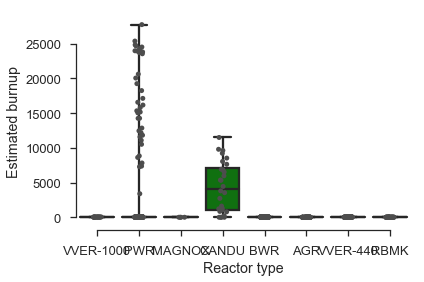

In [26]:
sns.set(style="ticks", palette=sns.color_palette("deep"),context='talk')
sns.set_context='talk'
ax = sns.boxplot(x="Reactor type", y="Estimated burnup", data=X_unique_rods,
                 whis=np.inf,color='g')

# Add in points to show each observation
sns.stripplot(x="Reactor type", y="Estimated burnup", data=X_unique_rods,
              jitter=True, size=5, color=".3", linewidth=0)


# Make the quantitative axis logarithmic
#ax.set_xscale("log")
sns.despine(trim=True)

plt.show()

## Pu-239 and Reactor Type

In [27]:
X_pu239 = X.loc[X['Item']=='Pu239',['Reactor type','Value','Estimated burnup','Unit']]

In [28]:
X_pu239.groupby('Reactor type').Value.mean()

Reactor type
AGR            0.002320
BWR          869.344323
CANDU          1.999146
MAGNOX         0.319386
PWR          197.498694
RBMK           0.002425
VVER-1000      5.180981
VVER-440       1.032255
Name: Value, dtype: float64

Note the seemingly errant PWR value. Upon inspection...

In [29]:
# Use a boolean to select the rows we want, and specify the columns (and column order) we want in a list
X_pu239.loc[X_pu239['Value'] > 100.0, ['Reactor type','Estimated burnup','Value','Unit']]

,Reactor type,Estimated burnup,Value,Unit
SFCompo sample ref,,,,
FDN-2|2F2D1|B3|TU103,BWR,10.000,4732.000000,Î¼g/gUi
FDN-2|2F2D1|B3|TU103,BWR,10.000,4810.000000,Î¼g/gUf
FDN-2|2F2D1|B3|TU104,BWR,9.400,4538.000000,Î¼g/gUi
FDN-2|2F2D1|B3|TU104,BWR,9.400,4610.000000,Î¼g/gUf
FDN-2|2F2D1|B3|TU105,BWR,12.300,4553.000000,Î¼g/gUi
FDN-2|2F2D1|B3|TU105,BWR,12.300,4640.000000,Î¼g/gUf
FDN-2|2F2D1|F6|TU101,BWR,14.000,4761.000000,Î¼g/gUi
FDN-2|2F2D1|F6|TU101,BWR,14.000,4860.000000,Î¼g/gUf
FDN-2|2F2D1|F6|TU102,BWR,18.200,4039.000000,Î¼g/gUi


The units are 1 / 1e6 rather than 1 / 1 or 1 / 1e3.
Here's one way to do some unit conversions

In [30]:
def changeUnit(Y, old_unit, new_unit, scalar):
    for i,old in enumerate(old_unit):
        Y.loc[Y['Unit'] == old, 'Value'] = Y.loc[Y['Unit'] == old, 'Value'] * scalar[i]
        Y.loc[Y['Unit'] == old, 'Unit'] = new_unit[i]
        
# apply function to change Pu-239 measured in grams per tonne to grams per kilogram
changeUnit(X_pu239, ['g/tUi', 'g/tHMi'], ['g/kgUi','g/kgHMi'], [1.0/1000, 1.0/1000])

In [32]:
# Note, we could change all the units to get more representative depiction of Pu-239 and reactor class trends
# if we decided on new unit(s) and appropriate conversion factor(s)
for x in X_pu239['Unit'].unique():
    print(x)
    # if using Python 3, do 
    # print(x)

mg/gUi
g/kgUi
mg/gFueli
g/gUi
mol/molPuf
g/gFueli
g/gHMi
mg/gU238f
mol/molUf
Î¼g/gUi
Î¼g/gUf
kg/tUi
mol/molHMi
mol/gFueli
mol/molU238f
kg/kgPuf
g/gU238f
mg/gHMi
g/kgHMi
mol/molU238i


# Output

## To Excel

In [ ]:
# Note, this is easy, but slow
Y = X[['Reactor Name','Reactor Type','Coolant inlet temperature','Coolant outlet temperature','Coolant temperature change']]
Y.to_excel('./TestExcelOutput.xlsx')

## To numpy array

For this to work, you'll need to construct a dataframe of all numeric values. You'll probably also want to convert all units since we'll drop the units when converting from strings to numerics

In [ ]:
# <All Numeric DataFrame>.as_matrix() or <All Numeric DataFrame>.Values

## To pickle

In [ ]:
Y.to_pickle('./TestPickle.pkl')

## To LaTeX

In [ ]:
# imperfect, but get's you most of the way there
latex_string = Y.iloc[0:10,:].to_latex(index=False)
latex_string

# Thanks

Please report any errors or request changes to daymankj@ornl.gov

# More info

Pandas documentation: http://pandas.pydata.org/pandas-docs/stable/ 

Pandas tutorials: http://pandas.pydata.org/pandas-docs/stable/tutorials.html

Pandas workshop on Youtube: https://www.youtube.com/watch?v=5JnMutdy6Fw&

Seaborn documentation & galleries: http://seaborn.pydata.org/index.html

Jupyter/iPthon notebooks: http://jupyter-notebook-beginner-guide.readthedocs.io/en/latest/